# Evolutionary Multiple objective Optimization

In [1]:
from numpy import random
import matplotlib.pyplot as plt
import common as cm
import numpy as np

## 1. Benchmark  problem - discussion

In this exerciese, your are asked to implement and use an evolutionary algorithm to approximate the Pareto front of the following problem:

$min$ $\hspace{0.5cm}$  $f_{1} = p(x)\cdot h(x)$, <br>
$min$ $\hspace{0.5cm}$  $f_{2} = (1- p(x))\cdot h(x)$,<br><br>
where $p(x) = \dfrac{\sum_{j = 1}^{n} 2\vert x_{j} - 0.5 \vert }{n}, \hspace{1cm} h = 1 + \dfrac{\sum_{j = n + 1}^{2n} \left(2\vert x_{j} -0.5 \vert \right) ^{1/\alpha}}{n},$<br>
$x_{j} \in [0, 1]$

The 'getRandomDecisionVector' method generates a random decision vector of length 2n:

In [2]:
def getRandomDecisionVector(n):
    return random.rand(1, 2 * n)[0]

# getRandomDecisionVector(5)

# print(np.sum([i for i in range(10)]))
n=1
for j in range(n):
    print(j)
print()
for j in range(n, 2*n):
    print(j)

0

1


1.1) #TODO Finish the 'evaluate' method. Input - x = a decision vector, n - 2n = the number of decision variables, alpha - a problem-specific parameter; Output - an objective vector.

In [3]:
def evaluate(x, n, alpha):
#     print("eval:", x,n,alpha)
    p = np.sum([2*abs(x[j]-0.5) for j in range(n)]) / n
    h = 1 + np.sum([(2*abs(x[j]-0.5))**(1/alpha) for j in range(n, 2*n)]) / n #celowo indeksowanie od n, nie od n+1 jak we wzorze, bo tablice są indeksowane od 0
#     for j in range(n):
#         print("x" + str(j), x[j])
#     print(" ")
#     for j in range(n, 2*n):
#         print("x" + str(j), x[j])
#     print("p:",p)
#     print("h:",h)
    return [p*h, (1-p)*h]

1.2) The below code generates 1000 random solutions for different values of n and alpha (2n = the number of decision variables). How the distribution of solutions changes for different values of these parameters? Note that the decision vectors are drawn from a uniform distribution.

In [4]:
n = [1, 3, 5] # different values of n (2n = number of decision variables)
alpha = [1.0, 5.0, 10.0] # different values of alpha
crossed_params = [[n[int(i / 3)], alpha[i % 3]] for i in range(9)]
decision_vectors = 1000
PLOT_SIZE = 15 # Change this if you want to resize the plots.

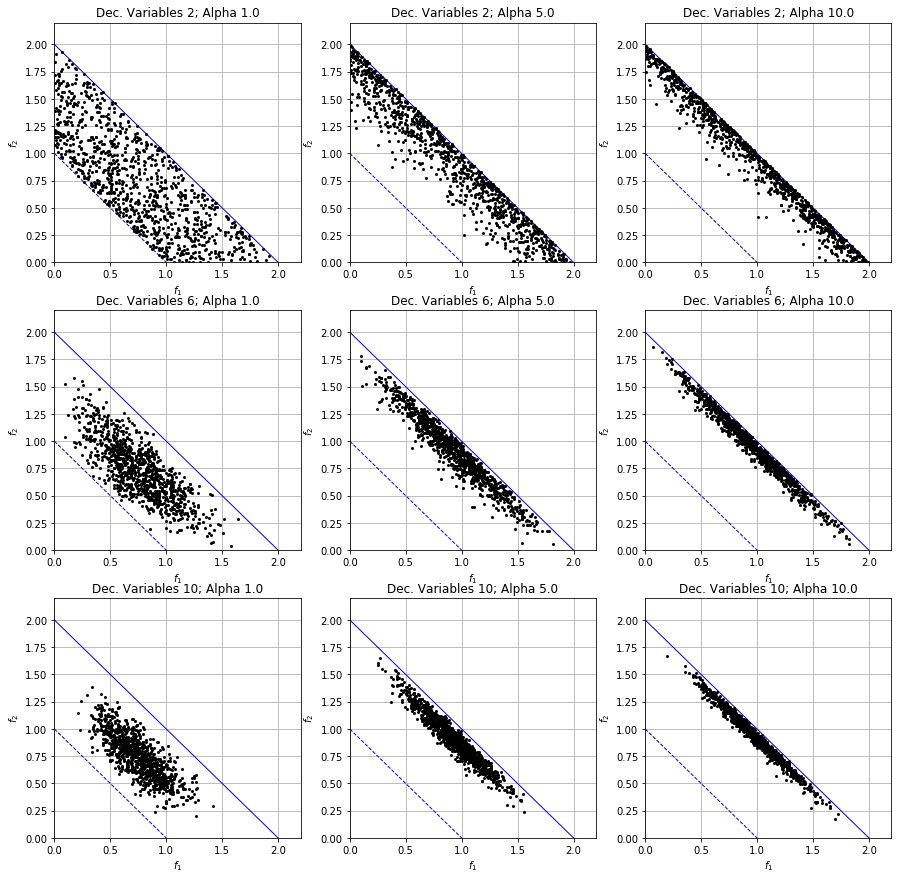

In [5]:
plt.figure(figsize=(PLOT_SIZE, PLOT_SIZE))

for i, p in enumerate(crossed_params):
#     print(i, p[0], p[1])
    solutions = [evaluate( getRandomDecisionVector(p[0]), p[0], p[1]) for i in range(decision_vectors)]
    ax = plt.subplot(3, 3, i + 1)
    cm.adjustPlot(plt, ax, solutions, "Dec. Variables {}; Alpha {}".format(p[0] * 2, p[1]))
plt.show()

## 2. Mutation operation

2.1) #TODO Mutation operator is used to perturbate the decision vector. In other words, it slighly changes individuals in the population so as to explore the objective space. In this exercise, implement a simple Gaussian mutation. Start with the 'mutateValue' method. It should alter the input 'value' by adding a small value being drawn from the normal distribution with some small sigma, e.g., 0.05 (numpy.random.normal). However, the altered value may not be in the [0, 1] limits. In that case, repeat the process as long as the altered decision variable is infeasible.
  

In [6]:
def mutateValue(value, sigma=0.05):
    mu = 0
    while True:
#         print("losowanie")
        mutated_value = value + np.random.normal(mu, sigma)
#         print(mutated_value)
        if 0 <= mutated_value <= 1:
            return mutated_value

# mutateValue(0.001)

2.2) Run the below code and check the possible outcomes (distributions) of the 'mutateValue' method. The three scenarios involve altering $0.25$, $0.50$, and $0.75$ values. You can modify the sigma and observe the outcomes.

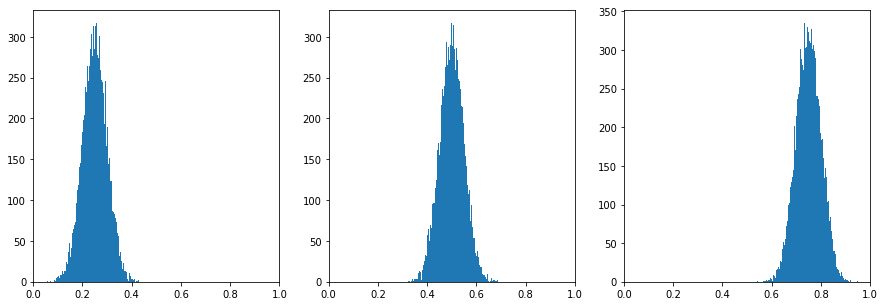

In [7]:
samples = [[mutateValue(0.25, sigma=0.05) for i in range(10000)], 
           [mutateValue(0.5, sigma=0.05) for i in range(10000)],
           [mutateValue(0.75, sigma=0.05) for i in range(10000)]]

plt.figure(figsize=(PLOT_SIZE, PLOT_SIZE / 3))
for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    ax.set_xlim(0.0, 1.0)
    count, bins, ignored = plt.hist(samples[i], 100)
plt.show()

2.3) #TODO finish the 'mutateVector' method. It should perturbate the input decision vector and return a new, modified one. For this reason, use the 'mutateValue' method (pass 'sigma' parameter). In this exercise, randomly decide whether to mutate a decision variable or not. Specifically, set the probability of altering a decision variable to 'probability' (method's argument).

In [8]:
def mutateVector(decision_vector, probability, sigma = 0.05):
    mutated_vector = []
    for i in decision_vector:
        if np.random.uniform() <= probability:
            mutated_vector.append(mutateValue(i, sigma))
        else:
            mutated_vector.append(i)
    return mutated_vector

2.4) Run the below code (observe the value of 'probability'). The generated plots illustrate some original solutions (red dots) being altered $1000$ times (black dots). 

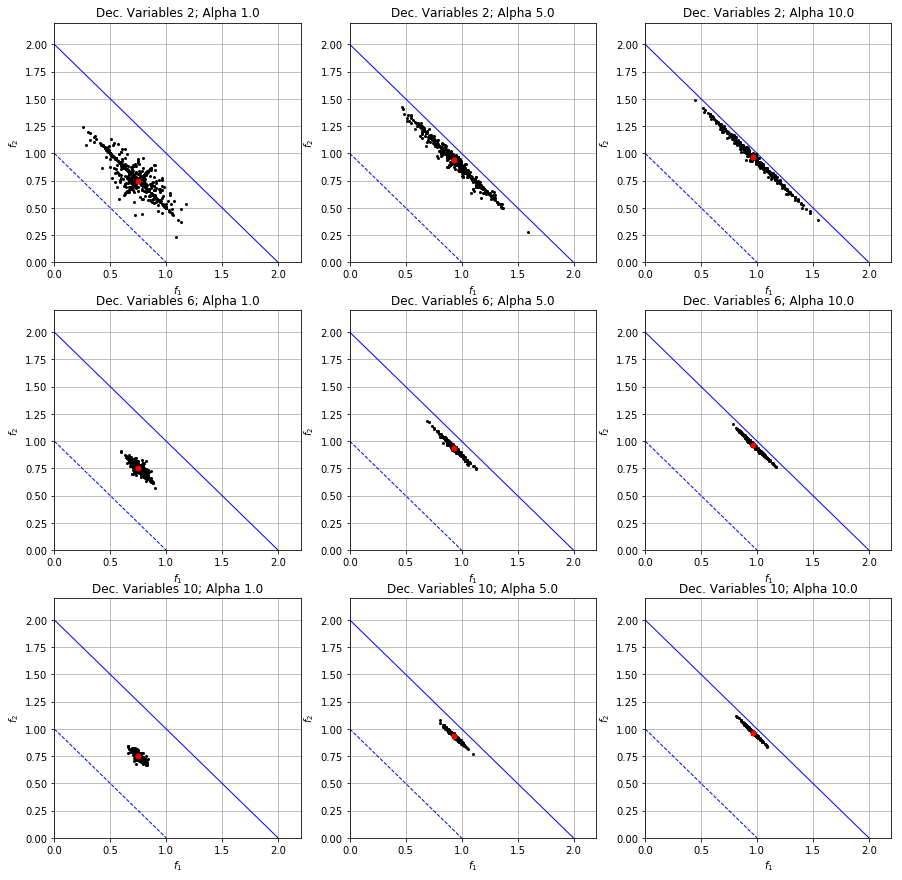

In [9]:
plt.figure(figsize=(PLOT_SIZE, PLOT_SIZE))

for i, p in enumerate(crossed_params):
    probability = 1.0 / (p[0] * 2)
    main_vector = [0.25 for i in range(p[0] * 2)]
    main_solution = evaluate(main_vector, p[0], p[1])
    solutions = [ evaluate(mutateVector(main_vector, probability, sigma = 0.05), p[0], p[1]) for i in range(decision_vectors) ]
    
    ax = plt.subplot(3, 3, i + 1)
    cm.adjustPlot(plt, ax, solutions, "Dec. Variables {}; Alpha {}".format(p[0] * 2, p[1]))
    plt.plot(main_solution[0], main_solution[1], marker='o', linestyle='', markersize=5, mfc = 'red' ,mec='red')
plt.show()

## 3. Crossover operator

3.1) #TODO Crossover operator combines two decision vectors to generate offspring, which is expected to possess the best features of its parents. Implement the 'crossoverTwoVectors' method which returns a new decision vector. Set each i-th element of the new vector to some random convex combination of the i-th values of dv1 and dv2 (decision vectors).

In [10]:
# random convex combination -- czy to oznacza, że mamy losować wagi?

def crossoverTwoVectors(dv1, dv2):
    offspring = []
    for first, second in zip(dv1, dv2):
        weight = np.random.uniform()
        offspring.append(weight * first + (1-weight) * second)
    return offspring

3.2) Run the below code. The generated plots illustrate some original parent solutions (red dot) being combined $1000$ times (black dots). 

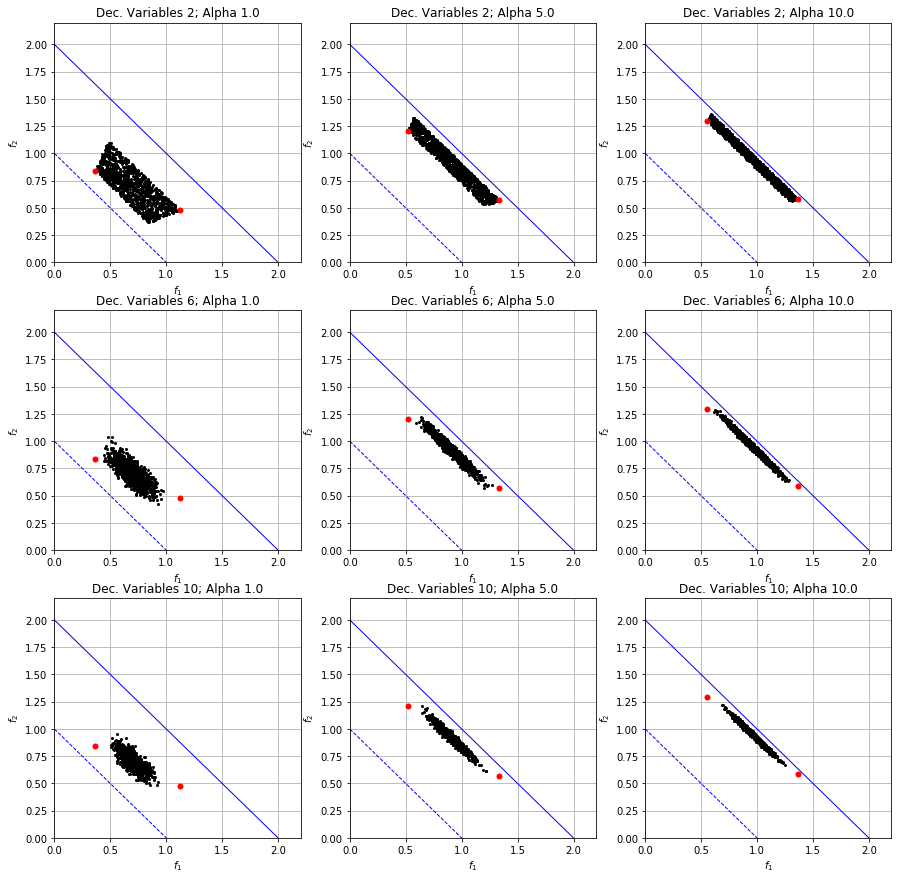

In [11]:
plt.figure(figsize=(PLOT_SIZE, PLOT_SIZE))

for i, p in enumerate(crossed_params):
    main_vector1 = [0.35 for i in range(p[0])] + [0.6 for i in range(p[0])]
    main_solution1 = evaluate(main_vector1,p[0], p[1])
    main_vector2 = [0.15 for i in range(p[0])] + [0.8 for i in range(p[0])]
    main_solution2 = evaluate(main_vector2, p[0], p[1])
    solutions = [ evaluate(crossoverTwoVectors(main_vector1, main_vector2),p[0], p[1]) for i in range(decision_vectors) ]
    ### PLOT IT 
    ax = plt.subplot(3, 3, i + 1)
    cm.adjustPlot(plt, ax, solutions, "Dec. Variables {}; Alpha {}".format(p[0] * 2, p[1]))
    plt.plot(main_solution1[0], main_solution1[1], marker='o', linestyle='', markersize=5, mfc = 'red' ,mec='red')
    plt.plot(main_solution2[0], main_solution2[1], marker='o', linestyle='', markersize=5, mfc = 'red' ,mec='red')
plt.show()

3.3) Run the below code and observe new solutions being generated by means of combined crossover and mutation operators. You can alter 'sigma' and 'probability' to observe which solutions would be generated. 

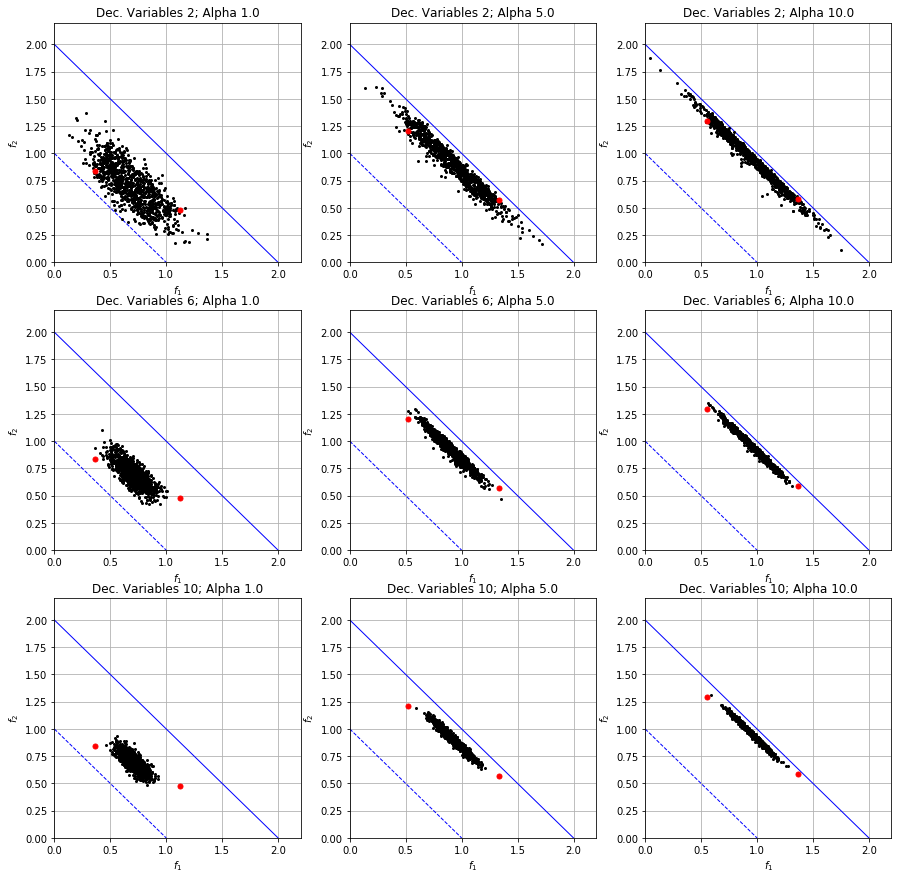

In [12]:
plt.figure(figsize=(PLOT_SIZE, PLOT_SIZE))

for i, p in enumerate(crossed_params):
    main_vector1 = [0.35 for i in range(p[0])] + [0.6 for i in range(p[0])]
    main_solution1 = evaluate(main_vector1,p[0], p[1])
    main_vector2 = [0.15 for i in range(p[0])] + [0.8 for i in range(p[0])]
    main_solution2 = evaluate(main_vector2, p[0], p[1])
    ### MODIFY HERE #############
    probability = 1.0 / (p[0] * 2)
    sigma = 0.05
    #############################
    solutions = [ evaluate(mutateVector(crossoverTwoVectors(main_vector1, main_vector2), probability = probability \
                                        , sigma=sigma), p[0], p[1]) for i in range(decision_vectors) ]
    ax = plt.subplot(3, 3, i + 1)
    cm.adjustPlot(plt, ax, solutions, "Dec. Variables {}; Alpha {}".format(p[0] * 2, p[1]))
    plt.plot(main_solution1[0], main_solution1[1], marker='o', linestyle='', markersize=5, mfc = 'red' ,mec='red')
    plt.plot(main_solution2[0], main_solution2[1], marker='o', linestyle='', markersize=5, mfc = 'red' ,mec='red')
plt.show()

# 4. Evolutionary Algorithm

4.1) Now, your task is to implement a simple evolutionary algorithm for multiple objective optimization. Use the following scheme: <br> <br>
    1] $P$ = create an initial population of size $N$ <br>
    2] $AssignFitness(P)$ <br>
    3] Sort $P$ according to fitness <br>
    4] $M$ = Generate a mating pool (list of pairs of parent solutions) <br>
    5] $O$ = Apply genetic operators to $M$ in order to generate offspring $O$ of size $N$ <br>
    6] $AssignFitness(O)$ <br>
    7] $P' = P \cup O$ ($|P'| = 2N$) <br>
    8] Sort $P'$ according to fitness <br>
    9] $P$ = first $N$ solutions in $P'$ (survival of the fittest) <br>
    10] Go back to $[4]$ if the stopping criterion is not satisfied
    
The above process is described in details in emo.pdf.
    
In the following, you will implement some auxiliary methods, e.g., getInitialPopulation (see the above scheme). Finally, you will implement the evolutionary algorithm, using the implemented methods.

4.2) Acquaint yourself with the following class:

In [13]:
alpha = 5.0 #xD

class Solution:
    # dv = decision vector
    # 2n = number of decision variables
    def __init__(self, dv, n):
#         print(dv)
#         print(n)
#         print(alpha)
        self.decision_vector = dv
        self.objective_vector = evaluate(dv, n, alpha)
        self.fitness = 0.0
        
    # if true: this solution dominates 'otherSolution'
    def dominates(self, otherSolution):
        if (self.objective_vector[0] < otherSolution.objective_vector[0]) and \
        (self.objective_vector[1] <= otherSolution.objective_vector[1]):
            return True
        if (self.objective_vector[0] <= otherSolution.objective_vector[0]) and \
        (self.objective_vector[1] < otherSolution.objective_vector[1]):
            return True
        return False

4.3) #TODO Finish the below method. It should create, and return, an initial population consisting of N solutions being generated randomly (2n = the number of decision variables) <br>

In [14]:
def getInitialPopulation(N, n):
    population = []
    for i in range(N):
        population.append(Solution(getRandomDecisionVector(n), n))
    return population

# getInitialPopulation(10, 5)

4.4) #TODO Finish the two below methods. The 'getNonDominatedFronts' method should partition solutions into non-dominated fronts. The method is expected to return a list of the following form: [[IDs of non-dominated solutions], [IDs of solutions in the second non-dominated front],...,[IDs of solutions in the last non-dominated front]. For instance: [[0, 2, 5], [3, 4], [1]] (ID = 0 <-> population[0]). Then, assign the solutions' fitness in the 'assignFitness' method (the first front = the fitness of 0, the second front = the fitness of 1, and so on).

In [15]:
def is_not_dominated(solution, population, not_sorted_IDs):
    for other in not_sorted_IDs:
        if population[other].dominates(solution):
            return False
    return True

def getNonDominatedFronts(population):
    fronts = []
    not_sorted_IDs = list(range(len(population))) #lista z indeksami, jest tu po to żeby z niej usuwać przydzielone elementy nie ruszając porządku we właściwej populacji
    
    while len(not_sorted_IDs) > 0:
        front = []
        for ID in not_sorted_IDs:
            if is_not_dominated(population[ID], population, not_sorted_IDs):
                front.append(ID)
        not_sorted_IDs = [x for x in not_sorted_IDs if x not in front] #remove assigned to this front from not sorted set
        fronts.append(front)
    
    return fronts

def assignFitness(population):
    fronts = getNonDominatedFronts(population)
    for fit, front in enumerate(fronts):
        for i in front:
            population[i].fitness = fit

In [16]:
#test above code
class SolutionMock:
    def __init__(self, point):
        self.objective_vector = point
        self.fitness = 0
        
    # if true: this solution dominates 'otherSolution'
    def dominates(self, otherSolution):
        if (self.objective_vector[0] < otherSolution.objective_vector[0]) and \
        (self.objective_vector[1] <= otherSolution.objective_vector[1]):
            return True
        if (self.objective_vector[0] <= otherSolution.objective_vector[0]) and \
        (self.objective_vector[1] < otherSolution.objective_vector[1]):
            return True
        return False
    
    def __str__(self):
        return str(self.objective_vector) + " fit: " + str(self.fitness)
    def __repr__(self):
        return str(self)

    
solutuion_mocks = [SolutionMock([3, 4]), SolutionMock([2, 5]),
                                SolutionMock([4, 2]), SolutionMock([7, 6]),
                                SolutionMock([6, 1]), SolutionMock([3.5, 5.5]),
                                SolutionMock([5, 4.5]), SolutionMock([5.5, 3])]
fronts = getNonDominatedFronts(solutuion_mocks)
print(fronts)

assignFitness(solutuion_mocks)
for mock in solutuion_mocks:
    print(mock.fitness)

[[0, 1, 2, 4], [5, 6, 7], [3]]
0
0
0
2
0
1
1
1


4.5) #TODO Finish the below method. It should sort the input list (population) in ascending order (the best solutions should be contained in the beggining of the list). Use 'fitness' as the key. 

In [17]:
def sortSolutions(population):
    population.sort(key=lambda x: x.fitness)
    
# sortSolutions(solutuion_mocks)
# print(solutuion_mocks)

4.6) #TODO Finish the below code. N new solutions have to be generated every generation. For these reason, parents must be selected (getMatingPool) and then recombined. To select parent solutions, implement a simple tournament selection of size two. Assuming that the solutions are sorted from the most to the least preferred, the tournament selection of size 2 randomly draws 2 solutions and chooses the one having the best (smallest) rank. Use this procedure to build a mating pool of the following form [[PARENT1, PARENT2], [PARENT3, PARENT4],...,[PARENT(2N-1), PARENT(2N)]]. Each two parents (e.g., 1 and 2) will be used to generated a single offspring solution.

In [18]:
def select_parent(population, tournament_size=2):
    idx = np.min(np.random.randint(0, len(population), size=tournament_size))
    return population[idx]

def getMatingPool(population, N):
    mating_pool = []
    for i in range(N):
        mating_pool.append([select_parent(population), select_parent(population)])
    return mating_pool

4.7) #TODO Finish the below code. Use the 'crossoverTwoVectors' and 'mutateVector' methods to recombine parent solutions and construct an offspring population of size N. Set 'sigma' to 0.05 and 'probability' to 1/(2n). 

In [19]:
def createOffspring(mating_pool, N, n):
    offspring_population = []
    for parents in mating_pool:
        offspring = crossoverTwoVectors(parents[0].decision_vector, parents[1].decision_vector)
        offspring = mutateVector(offspring, probability=(1/(2*n)), sigma=0.05)
        offspring_population.append(Solution(offspring, n))
    return offspring_population

4.8) #TODO Finish the below code. It should concatenate 'population' and 'offspring' and return a combined population of size 2N.

In [20]:
def mergePopulations(population, offspring):
    return population + offspring

# mergePopulations(["a", 5], [0.5, "asd"])

4.9) #TODO Finish the below code. It should return a list of the N-best solutions in the input population (it is assumed that the solutions are already sorted from the most to the least preffered, according to fitness). 

In [21]:
def survivalOfTheFittest(merged, N):
#     sortSolutions(merged)
    return merged[:N]

4.10) Now, it is time to combine the above methods and implement an evolutionary algorithm for multiple objective optimization. 

In [22]:
# Some params
N = 50 # population size
n = 3 # 2n = number of decision variables
alpha = 5.0 # problem-specific parameter
PLOT_EVERY = 50 # plot every 'PLOT_EVERY' generations
generations = 8 * PLOT_EVERY # the total number of generations

4.11) #TODO Implement the algorithm here. Use the above implmented methods and follow the scheme provided in point 4.1. Furthermore, capture the 'snapshots' of constructed populations (see the below comment).

In [23]:
SNAPSHOTS = []

# Create an initial population
random_population = getInitialPopulation(N, n)
# Assign fitness
assignFitness(population=random_population)
# Sort solutions
sortSolutions(random_population)
# Repeat for 'generations' iterations
population = random_population
for generation in range(generations):
    # -- Construct a mating pool
    mating_pool = getMatingPool(population, N)
    # -- Generate an offspring population
    offspring_population = createOffspring(mating_pool, N, n)
    # -- Create a combined population (parents + offspring)
    combined_population = mergePopulations(population, offspring_population)
    # -- Assign fitness (combined population)
    assignFitness(combined_population)
    # -- Sort solutions (combined population)
    sortSolutions(combined_population)
    # -- Set the current population to N-best memberd of the merged population
    population = survivalOfTheFittest(combined_population, N)
    # -- Capture snapshots
    ### Use the following code to capture (and display later) populations constructed after 1, 1/8*generations,
    # 2/8*generations,..., generations.
    if ((generation + 1) % PLOT_EVERY == 0) or generation == 0:
        SNAPSHOTS.append(population.copy())


4.12) Run the below code and observe how the population moves towards the Pareto front. However, the distribution of solutions in the final population is poor. Most of them are concentrated around the middle of the Pareto front. Why?

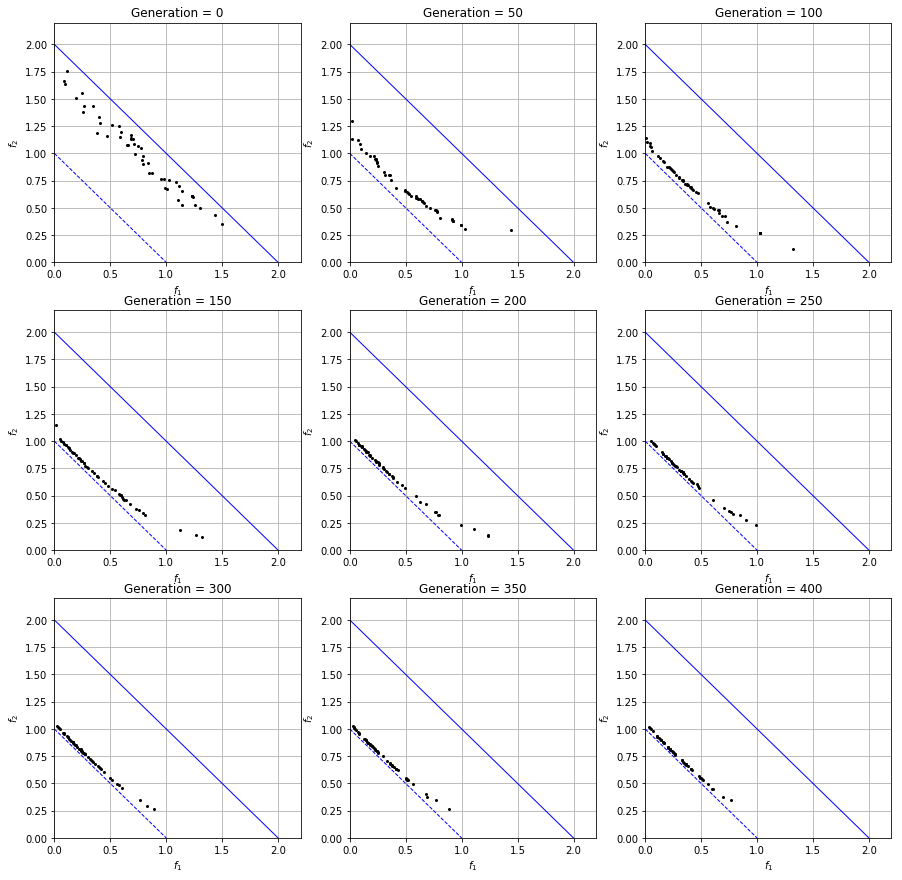

In [24]:
cm.displaySnapshots(plt, PLOT_EVERY, PLOT_SIZE, SNAPSHOTS)

4.13) #TODO Copy & paste the above finished algotihm. This time, hovewer, compute the GD and IGD the population attains in each generation. Use cm.getGenerationalDistance(some population) and cm.getInvertedGenerationalDistance(some population, N). Append the results to GD and IGD lists. 

In [25]:
GD = []
IGD = []

# Create an initial population
random_population = getInitialPopulation(N, n)
# Assign fitness
assignFitness(population=random_population)
# Sort solutions
sortSolutions(random_population)
# Repeat for 'generations' iterations
population = random_population
for generation in range(generations):
    # -- Construct a mating pool
    mating_pool = getMatingPool(population, N)
    # -- Generate an offspring population
    offspring_population = createOffspring(mating_pool, N, n)
    # -- Create a combined population (parents + offspring)
    combined_population = mergePopulations(population, offspring_population)
    # -- Assign fitness (combined population)
    assignFitness(combined_population)
    # -- Sort solutions (combined population)
    sortSolutions(combined_population)
    # -- Set the current population to N-best memberd of the merged population
    population = survivalOfTheFittest(combined_population, N)

    GD.append(cm.getGenerationalDistance(population))
    IGD.append(cm.getInvertedGenerationalDistance(population, N))


4.14) Run the below code and observe how GD and IGD changed over time. Repeat the simulation several times. You should observe that, usually, the attained GD was better (lesser) than IGD attained in the end of the optimization run. In turn, IGD was better in the beggining. Why?

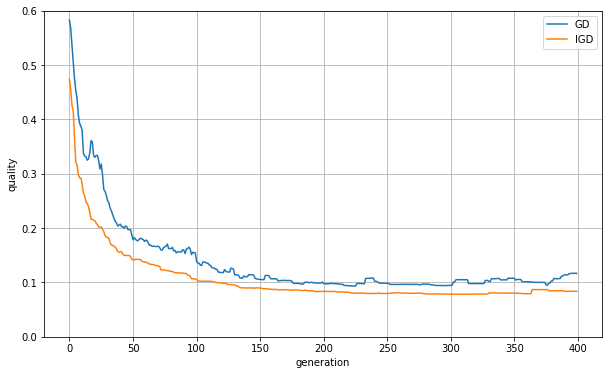

In [26]:
cm.plotQualityIndicators(plt, GD, IGD)

# 5.    4.0 for completing this assignment

5.1) #TODO Now, improve the algorithm by applying the crowding-distance to favour well-distributed solutions in the course of the optimization. Complete the below code. Firstly, use 'getNonDominatedFronts' to partition the solutions into non-dominance fronts and set the solutions' fitness. Then, for each front, compute solutions' crowding-distance value and update their fitness (normalize the crowding-distance value such that it fits the limits of [0, 1) ).

In [27]:
#zwraca odwrotność, więc mniejsze wartości będą lepsze
#jest tak dlatego, że potem ta wartość (po normalizacji) jest dodawana do fitness
#a fitness im mniejszy tym lepszy
def calculate_crowding_distance(previous_neighbor, next_neighbor, x_range, y_range):
#     print(previous_neighbor)
#     print(next_neighbor)
#     assert x_range != 0
#     assert y_range != 0
#     assert abs(x_range) > 0.00001
#     assert abs(y_range) > 0.00001
    x = (previous_neighbor.objective_vector[0] - next_neighbor.objective_vector[0]) / x_range
    y = (next_neighbor.objective_vector[1] - previous_neighbor.objective_vector[1]) / y_range
#     print(x, y)
    if not (x > 0 or y > 0):
#         print(previous_neighbor.objective_vector, next_neighbor.objective_vector, x, y)
        return 99999999
    return 1 / ((x + y) / 2)

def normalize_crowding_distances(crowding_distances):
    divisor = max(crowding_distances) + 0.01
#     assert divisor != 0
    for i in range(len(crowding_distances)):
        crowding_distances[i] /= divisor
    

def assignFitnessWithCrowding(population):
    fronts = getNonDominatedFronts(population)
    assignFitness(population)
#     print(population)
    for front in fronts:
        front_solutions = [population[i] for i in front]
#         print(front_solutions)
        front_solutions.sort(key=lambda x: (x.objective_vector[0], x.objective_vector[1]), reverse=True)
#         print(front_solutions)
        crowding_distances = []
        
        crowding_distances.append(0)#skrajny element
        x_min = min(front_solutions, key=lambda x : x.objective_vector[0]).objective_vector[0]
        x_max = max(front_solutions, key=lambda x : x.objective_vector[0]).objective_vector[0]
        y_min = min(front_solutions, key=lambda x : x.objective_vector[1]).objective_vector[1]
        y_max = max(front_solutions, key=lambda x : x.objective_vector[1]).objective_vector[1]
        x_range = x_max - x_min
        y_range = y_max - y_min
#         print(x_min, x_max, y_min, y_max)
        for i in range(1, len(front_solutions)-1):
            crowding_distances.append(calculate_crowding_distance(front_solutions[i-1], front_solutions[i+1], x_range, y_range))
#             print(crowding_distances[-1])
        crowding_distances.append(0)#skrajny element
        
#         print(crowding_distances)
        normalize_crowding_distances(crowding_distances)
#         print(crowding_distances)
#         print(front_solutions)
        for i in range(len(front_solutions)):
            front_solutions[i].fitness += crowding_distances[i]
#     print("\n",population)

        
solutuion_mocks = [SolutionMock([3, 4]), SolutionMock([2, 5]),
                                SolutionMock([4, 2]), SolutionMock([7, 6]),
                                SolutionMock([6, 1]), SolutionMock([3.5, 5.5]),
                                SolutionMock([5, 4.5]), SolutionMock([5.5, 3])]
assignFitnessWithCrowding(solutuion_mocks)

5.2) #TODO Copy & paste the algorithm you have finished in step 4.12. This time, use assignFitnessWithCrowding method. Run the below pieces of code. Observe the plots. Have the results improved? 

In [28]:
SNAPSHOTS = []
GD = []
IGD = []

# Create an initial population
random_population = getInitialPopulation(N, n)
# Assign fitness
assignFitness(population=random_population)
# Sort solutions
sortSolutions(random_population)
# Repeat for 'generations' iterations
population = random_population
for generation in range(generations):
    # -- Construct a mating pool
    mating_pool = getMatingPool(population, N)
    # -- Generate an offspring population
    offspring_population = createOffspring(mating_pool, N, n)
    # -- Create a combined population (parents + offspring)
    combined_population = mergePopulations(population, offspring_population)
    # -- Assign fitness (combined population)
    assignFitnessWithCrowding(combined_population)
    # -- Sort solutions (combined population)
    sortSolutions(combined_population)
    # -- Set the current population to N-best memberd of the merged population
    population = survivalOfTheFittest(combined_population, N)
    
    GD.append(cm.getGenerationalDistance(population))
    IGD.append(cm.getInvertedGenerationalDistance(population, N))
    
    # -- Capture snapshots
    ### Use the following code to capture (and display later) populations constructed after 1, 1/8*generations,
    # 2/8*generations,..., generations.
    if ((generation + 1) % PLOT_EVERY == 0) or generation == 0:
        SNAPSHOTS.append(population.copy())


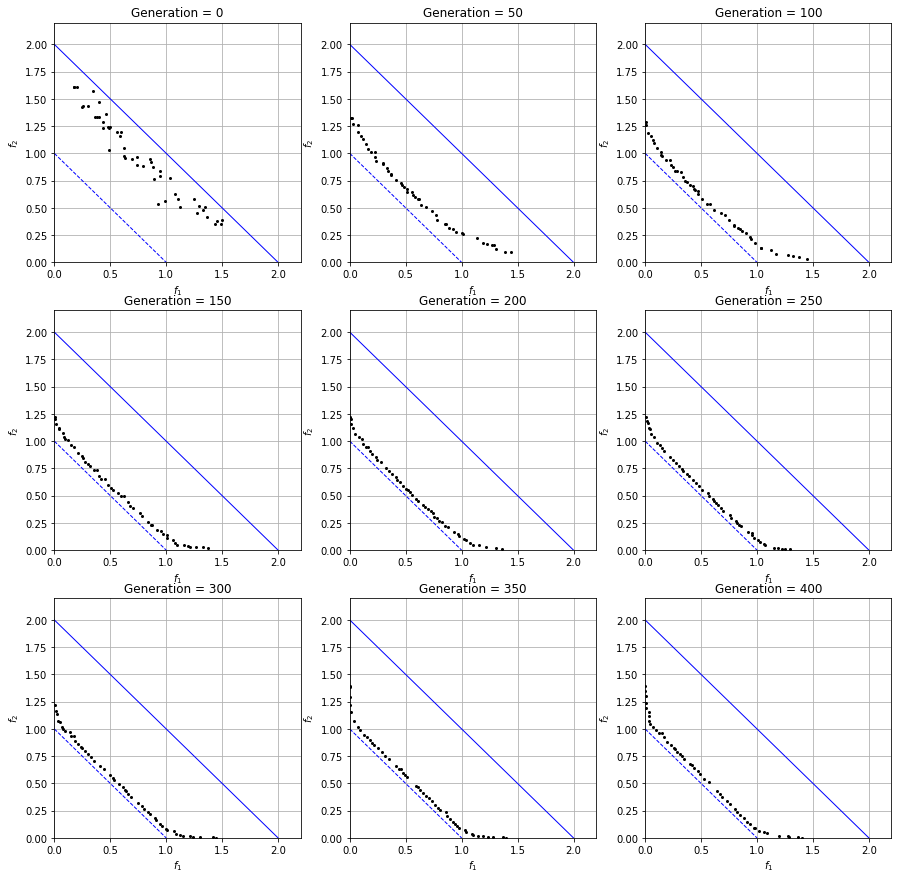

In [29]:
cm.displaySnapshots(plt, PLOT_EVERY, PLOT_SIZE, SNAPSHOTS)

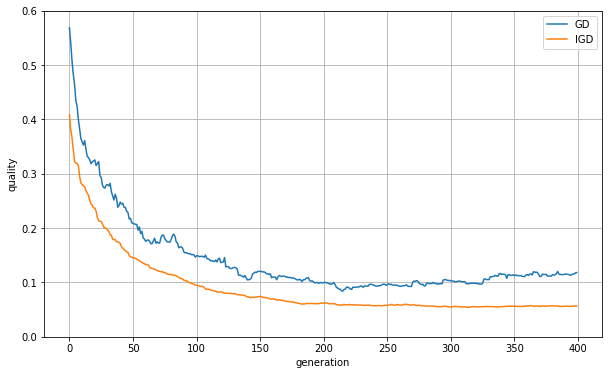

In [30]:
cm.plotQualityIndicators(plt, GD, IGD)

# 6. 5.0 for completing this assignment

6.1) #TODO The results which are derived from a single optimization run are not credible as the evolutionary algorithms are susceptible to some random fluctuations. In this exercise, you are asked to compute the GD and IGD averaged over 10 independent runs. Then, plot the mean and std values of GD and IGD (see, e.g., this plot http://www.randalolson.com/wp-content/uploads/chess-piece-capture-rate-over-time.png). Use e.g., plt.fill_between.

In [31]:
def run_algorithm(GD, IGD):
    # Create an initial population
    random_population = getInitialPopulation(N, n)
    # Assign fitness
    assignFitness(population=random_population)
    # Sort solutions
    sortSolutions(random_population)
    # Repeat for 'generations' iterations
    population = random_population
    for generation in range(generations):
        # -- Construct a mating pool
        mating_pool = getMatingPool(population, N)
        # -- Generate an offspring population
        offspring_population = createOffspring(mating_pool, N, n)
        # -- Create a combined population (parents + offspring)
        combined_population = mergePopulations(population, offspring_population)
        # -- Assign fitness (combined population)
        assignFitnessWithCrowding(combined_population)
        # -- Sort solutions (combined population)
        sortSolutions(combined_population)
        # -- Set the current population to N-best memberd of the merged population
        population = survivalOfTheFittest(combined_population, N)

        GD[generation] = cm.getGenerationalDistance(population)
        IGD[generation] = cm.getInvertedGenerationalDistance(population, N)

        # -- Capture snapshots
        ### Use the following code to capture (and display later) populations constructed after 1, 1/8*generations,
        # 2/8*generations,..., generations.
        if ((generation + 1) % PLOT_EVERY == 0) or generation == 0:
            SNAPSHOTS.append(population.copy())


In [32]:
TEST_RUNS = 10

GD = np.zeros([TEST_RUNS, generations])
IGD = np.zeros([TEST_RUNS, generations])

for i in range(TEST_RUNS):
    print("Run", i)
    run_algorithm(GD[i], IGD[i])
    #Run the method and capture GDs and IGDs

Run 0
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9


In [33]:
#Compute averaged statistics here

# print(GD)
MEAN_GD = np.mean(GD, axis=0)
# print(MEAN_GD)
STD_GD = np.std(GD, axis=0)
# print(STD_GD)

# print()
# print(IGD)
MEAN_IGD = np.mean(IGD, axis=0)
# print(MEAN_IGD)
STD_IGD = np.std(IGD, axis=0)
# print(STD_IGD)

In [34]:
x = np.arange(generations)

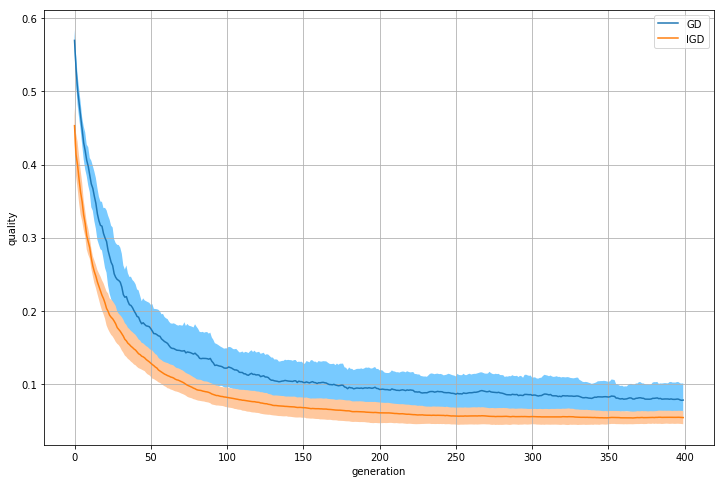

In [35]:
plt.figure(figsize=(12, 8))
plt.plot(x, MEAN_GD, label="GD")
plt.fill_between(x, MEAN_GD-STD_GD, MEAN_GD+STD_GD, facecolor='#78caff')

plt.plot(x, MEAN_IGD, label="IGD")
plt.fill_between(x, MEAN_IGD-STD_IGD, MEAN_IGD+STD_IGD, facecolor='#ffc89e')

plt.xlabel("generation")
plt.ylabel("quality")    
plt.grid(True)
plt.legend()
plt.show()